# Research question:
### What are the differences in the rythm complexity between muwassa, mahzuz and insiraf in Arab Andalusian music?

In [7]:
#########################################################
###  In case you're using Drive uncomment this cell.  ###
#########################################################

# YOUR_DRIVE_PATH = '/content/drive/MyDrive/AMPLab/Ethnomusicology'
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir(YOUR_DRIVE_PATH)

Mounted at /content/drive


In [1]:
print('Installing Music21...')
!pip install music21

print('Installing lilypond...')
!apt-get install lilypond > /dev/null

print('Done!')

Installing Music21...
  Using cached music21-8.1.0-py3-none-any.whl (22.8 MB)
     ---------------------------------------- 54.2/54.2 kB 1.4 MB/s eta 0:00:00
  Using cached jsonpickle-3.0.1-py2.py3-none-any.whl (40 kB)
Installing lilypond...
Done!


El sistema no puede encontrar la ruta especificada.


In [2]:
# Basic imports: Music21 for the analysis and IP.display to show the graphs.
from music21 import *
import os
from IPython.display import Image
import json

In [4]:
# The annotations from the .json file are loaded
jsonFile = 'arab-andalusian-scores-lines.json'

with open(jsonFile, 'r', encoding='utf-8') as f:
    annotations = json.load(f)

In [5]:
# Different tempo range sections
sectionNames = ['muassa‘', 'mahzūz', 'inṣirāf']

In [6]:
# Now let's create a simpler dictionary containing the starting and ending 
# offsets of each of this sections in each score.

sections = {}

for score in annotations:
    mbid = score['mbid']
    sections[mbid] = {}
    for section in score['sections']:
        name = section['name']
        if name in sectionNames:
            if name not in sections[mbid]:
                sections[mbid][name] = [(section['start'], section['end'])]
            else:
                sections[mbid][name].append((section['start'], section['end']))
            
for mbid in sections.keys():
    print(mbid)
    for section in sections[mbid].keys():
        print('  - {}: {}'.format(section, sections[mbid][section]))

7448d9c2-5261-4e70-bd98-6ed8416f908f
  - muassa‘: [(538.0, 3086.0)]
  - mahzūz: [(3088.0, 4677.0)]
  - inṣirāf: [(4677.5, 5418.0), (5428.0, 5634.0)]
8842c1f0-e261-4069-bd59-768bb9a3315c
  - muassa‘: [(261.0, 1646.5)]
  - inṣirāf: [(1652.5, 2843.5)]
a451a7fc-c53f-462a-b3fc-4377bb588105
  - muassa‘: [(214.0, 1763.5)]
  - mahzūz: [(1764.5, 2139.5)]
  - inṣirāf: [(2140.5, 3338.5)]
b11237b9-d45b-4b3a-a97b-ab7d198f927f
  - muassa‘: [(291.0, 1177.5)]
  - mahzūz: [(1179.0, 1567.5), (1572.0, 1676.5)]
  - inṣirāf: [(1678.75, 3286.75)]
f7bcb9af-6abb-4192-ae3d-37fa811034ce
  - muassa‘: [(291.0, 1651.5)]
  - mahzūz: [(1686.0, 1927.5), (1929.0, 2033.75)]
  - inṣirāf: [(2035.75, 3026.75), (3033.75, 4525.75)]


In [7]:
datasetPath = 'ArabAndalusianScores/'

# A dictionary with the section names as keys is created. Each of the nested
# dictionaries is initialized with an empty dictionary.

beatsDic = dict.fromkeys(sectionNames)
for key in beatsDic.keys():
    beatsDic[key] = {}

for mbid in sections.keys():
    print('Loading', mbid + '.xml')
    s = converter.parse(os.path.join(datasetPath, mbid + '.xml'))
    nr = s.parts[0]
    score = sections[mbid]
    for sectionName in score.keys():
        print('- Analyzing ', sectionName)
        section = score[sectionName]
        for scoreSection in section:
            start = scoreSection[0]
            end = scoreSection[1]
            sectionMeasures = nr.getElementsByOffset(start, end).stream() # All the measures in the section
            preTimeSign = sectionMeasures.getElementsByClass(stream.Measure)[0].getTimeSignatures()[0].ratioString
            for m in sectionMeasures:
                num, den = m.getTimeSignatures()[0].ratioString.split('/')
                # print(m.getTimeSignatures()[0].ratioString)
                num = int(num)
                den = int(den)
                if num / den == 3/4:
                    count = 3
                elif num / den == 6/4:
                    count = 6
                elif num / den == 4/4:
                    count = 4
                elif num / den == 2/4:
                    count = 2
                elif num / den == 8/4:
                    count = 8
                m.getTimeSignatures()[0].beatCount = count
                for n in m.notes:
                    if not n.duration.isGrace:
                        if n.beat % 1.0 == 0.0:
                            beatsDic[sectionName][0] = beatsDic[sectionName].get(0, 0) + 1 # Use the .beat attibute
                        elif n.beat % 1.0 == 0.5:
                            beatsDic[sectionName][1] = beatsDic[sectionName].get(1, 0) + 1 # Use the .beat attibute
                        elif n.beat % 1.0 in [0.25, 0.75]:
                            beatsDic[sectionName][2] = beatsDic[sectionName].get(2, 0) + 1 # Use the .beat attibute
                        elif n.beat % 1.0 in [0.125, 0.375, 0.3333333333333335, 0.6666666666666665]:
                            beatsDic[sectionName][3] = beatsDic[sectionName].get(3, 0) + 1 # Use the .beat attibute

Loading 7448d9c2-5261-4e70-bd98-6ed8416f908f.xml
- Analyzing  muassa‘
- Analyzing  mahzūz
- Analyzing  inṣirāf
Loading 8842c1f0-e261-4069-bd59-768bb9a3315c.xml
- Analyzing  muassa‘
- Analyzing  inṣirāf
Loading a451a7fc-c53f-462a-b3fc-4377bb588105.xml
- Analyzing  muassa‘
- Analyzing  mahzūz
- Analyzing  inṣirāf
Loading b11237b9-d45b-4b3a-a97b-ab7d198f927f.xml
- Analyzing  muassa‘
- Analyzing  mahzūz
- Analyzing  inṣirāf
Loading f7bcb9af-6abb-4192-ae3d-37fa811034ce.xml
- Analyzing  muassa‘
- Analyzing  mahzūz
- Analyzing  inṣirāf


In [12]:
beatsDic

{'muassa‘': {0: 6456, 1: 4585, 2: 1121, 3: 12},
 'mahzūz': {0: 2430, 1: 1730, 2: 405, 3: 2},
 'inṣirāf': {0: 6190, 1: 2215, 2: 513, 3: 2}}

Text(0.5, 1.0, '"Complexity" distribution for inṣirāf')

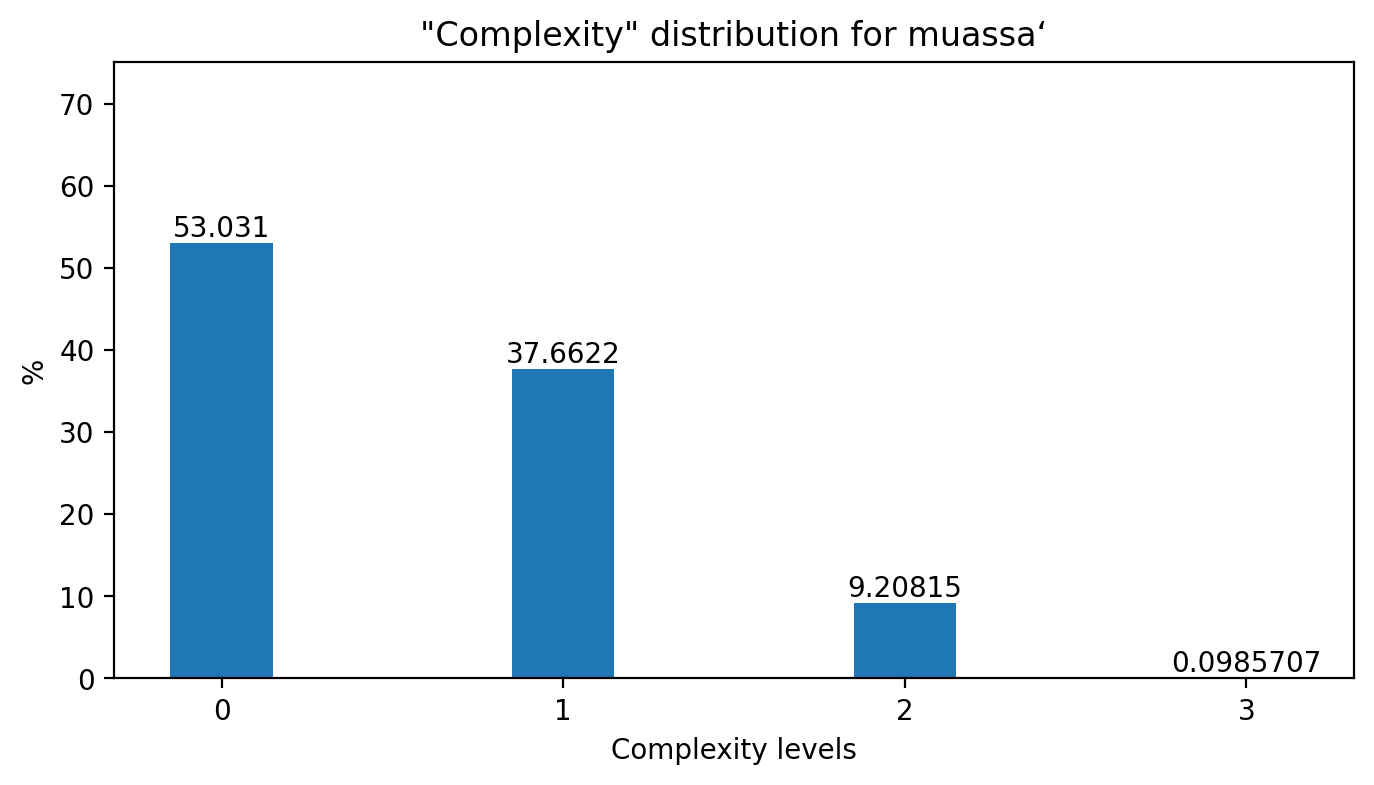

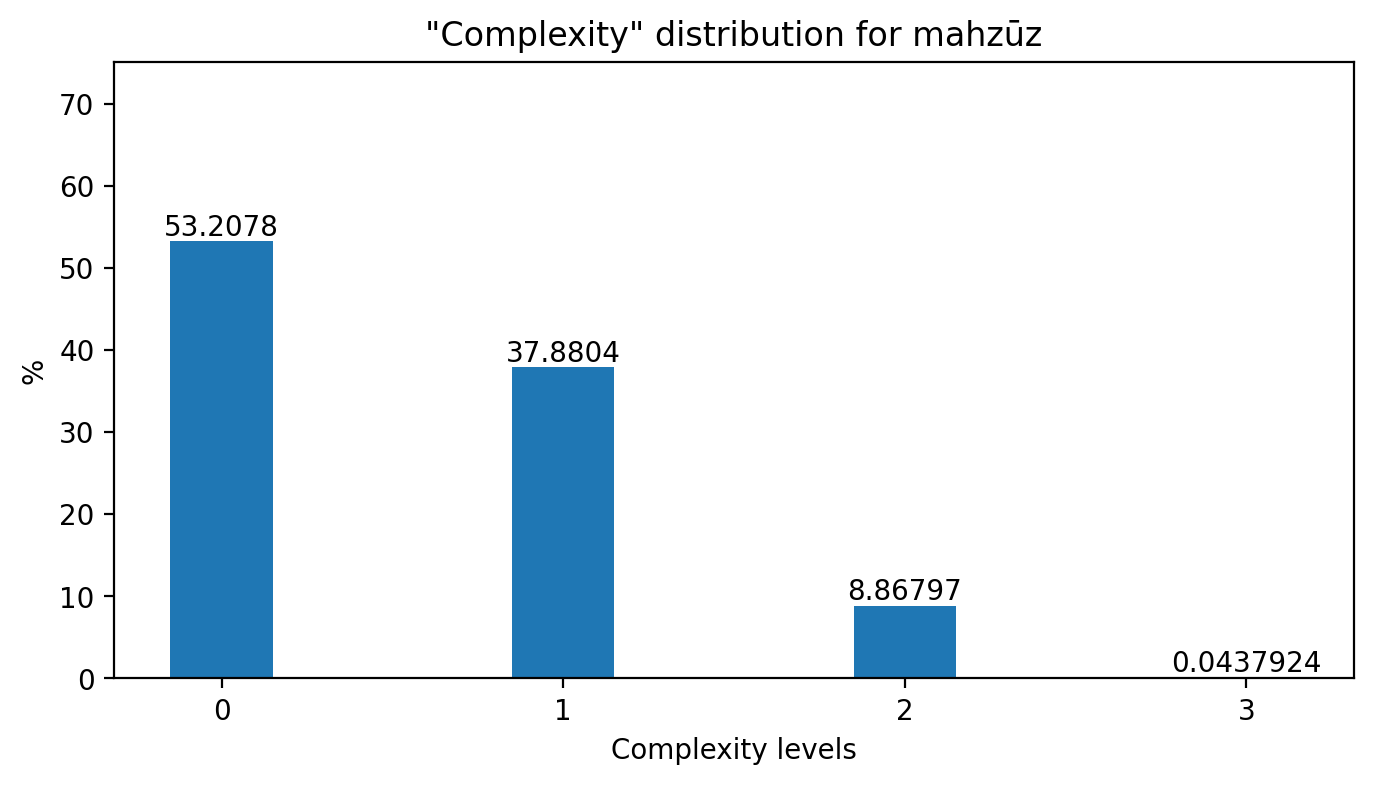

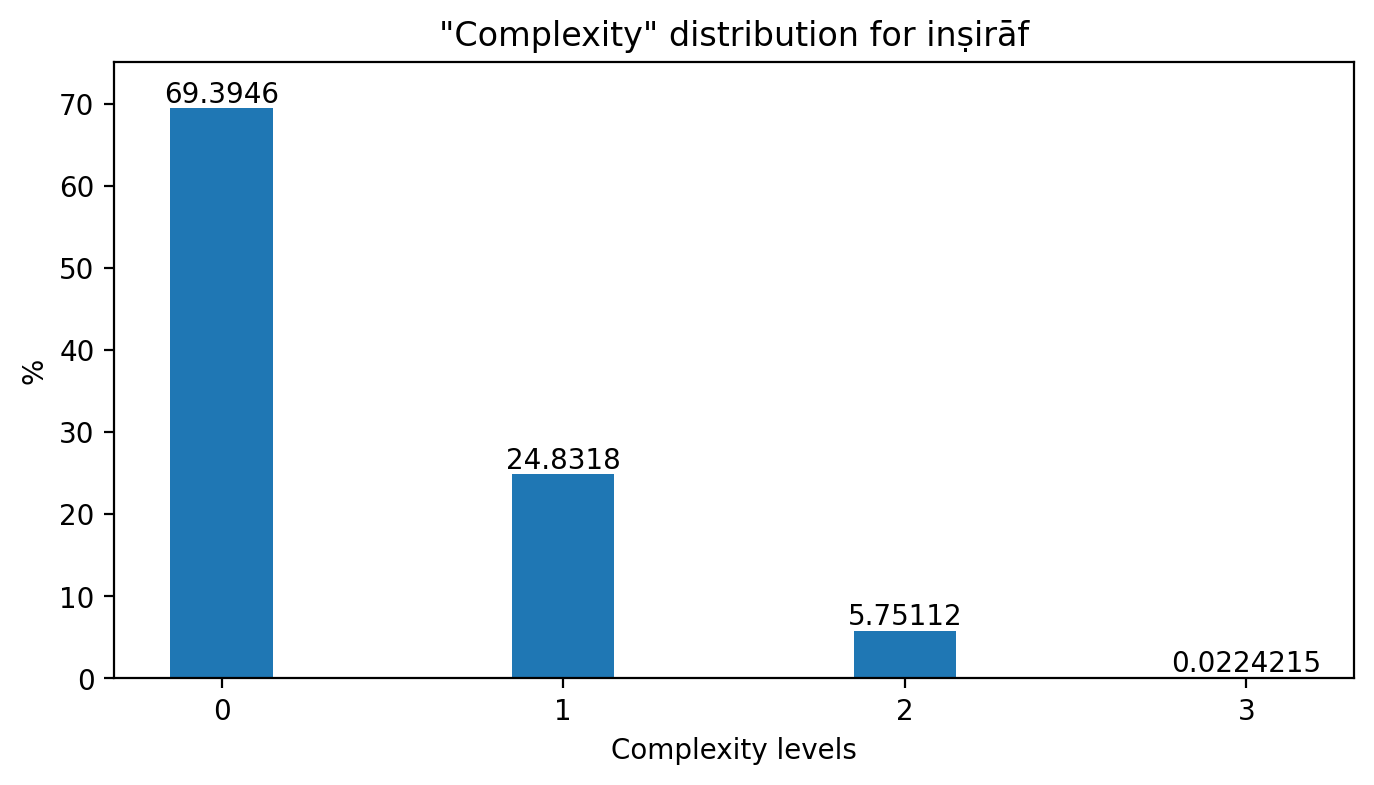

In [13]:
# The percentage of each of the complexity levels for each of the time sections is displayed.

import matplotlib.pyplot as plt

xValues = sorted(beatsDic[sectionNames[0]].keys())
yValues = [beatsDic[sectionNames[0]][x] for x in xValues]
yValues[:] = [y * 100 / sum(yValues) for y in yValues]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(xValues, yValues, width=0.3)
ax.bar_label(bars)
plt.xticks(range(0, 4))
plt.ylim([0, 75])

# Axis and graph title
plt.xlabel('Complexity levels') 
plt.ylabel('%') 
plt.title(f'"Complexity" distribution for {sectionNames[0]}')

xValues = sorted(beatsDic[sectionNames[1]].keys())
yValues = [beatsDic[sectionNames[1]][x] for x in xValues]
yValues[:] = [y * 100 / sum(yValues) for y in yValues]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(xValues, yValues, width=0.3)
ax.bar_label(bars)
plt.xticks(range(0, 4))
plt.ylim([0, 75])

# Axis and graph title
plt.xlabel('Complexity levels') 
plt.ylabel('%') 
plt.title(f'"Complexity" distribution for {sectionNames[1]}')

xValues = sorted(beatsDic[sectionNames[2]].keys())
yValues = [beatsDic[sectionNames[2]][x] for x in xValues]
yValues[:] = [y * 100 / sum(yValues) for y in yValues]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(xValues, yValues, width=0.3)
ax.bar_label(bars)
plt.xticks(range(0, 4))
plt.ylim([0, 75])

# Axis and graph title
plt.xlabel('Complexity levels') 
plt.ylabel('%') 
plt.title(f'"Complexity" distribution for {sectionNames[2]}')